***Question 0:***

The function given to us in the assignment can be strongly reduced. We can notice by expanding the first part of the function, $(\neg x_0 \lor x_1) \land (x_0 \lor x_1 \lor \neg x_2)$, that this part is a tautology, which means for the logic meaning we do not need to be interested by this part, and therefor the 2 first parentheses can be eliminated. By now step by step, (a screenshot of the calculation is attached in the next cell), we find that the function is logically equivalent to $$f(x_0, x_1, x_2, x_3, x_4) = (\neg x_1 \land \neg x_2 \land x_3 \land \neg x_4) \lor (\neg x_0 \land \neg x_2 \land x_3 \land \neg x_4)$$


The function takes value 1 for the following 3 inputs : $(0, 0, 0, 1, 0), (0, 1, 0, 1, 0), (1, 1, 0, 1, 0)$

Small mistake where the first two were actually oversimplified, and an $x_0$ remains, which goes into the second parenthesis, as is already seen in the formula above
![The reasoning for Q0](q0.jpeg.png)



***Question 1:***


Since there are fives $x_i$'s, and 6 clauses, and we will need a qubit for each of them, plus the final ancilla qubit that will take the xor of itself with the whole addition, we will need 12 qubits. We prepare the circuit with a Hadamard gate for all the qubits that are going to be our input, i.e. the first 5 qubits.

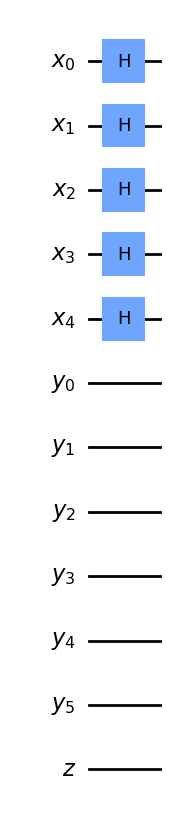

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_x = QuantumRegister(5, 'x')
qreg_y = QuantumRegister(6, 'y')
qreg_z = QuantumRegister(1, 'z')
circuit = QuantumCircuit(qreg_x, qreg_y, qreg_z)

circuit.h(qreg_x[0])
circuit.h(qreg_x[1])
circuit.h(qreg_x[2])
circuit.h(qreg_x[3])
circuit.h(qreg_x[4])
circuit.draw('mpl')

***Question 2:***

The first clause $(\neg x_0 \lor x_1)$ becomes $\neg(x_0 \land \neg x_1)$. Therefor we need to invert $x_1$ and then we will use a CCNOT to bind this to $y_0$

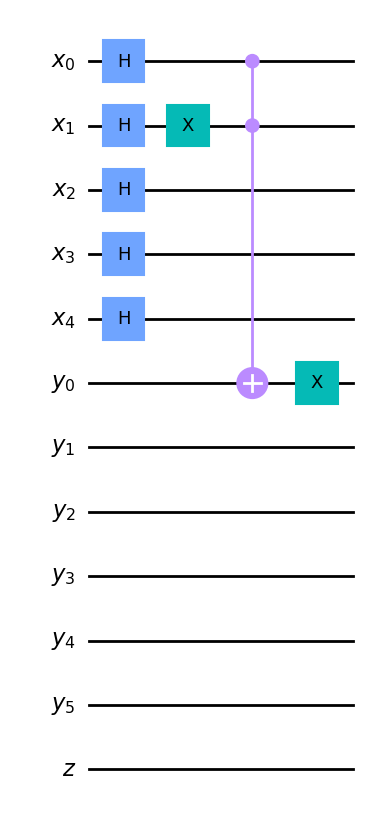

In [14]:
circuit.x(qreg_x[1])
circuit.mcx(qreg_x[0:2], qreg_y[0])
circuit.x(qreg_y[0])
circuit.draw('mpl')

The second clause, $(x_0 \lor x_1 \lor \neg x_2)$ becomes $\neg(\neg x_0 \land \neg x_1 \land x_2)$. We proceed analogously to the first clause on the circuit

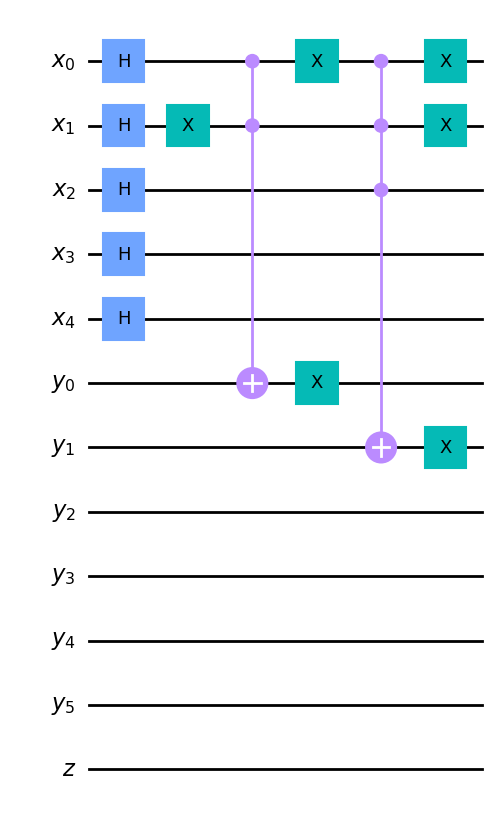

In [15]:
circuit.x(qreg_x[0])
circuit.mcx(qreg_x[0:3], qreg_y[1])
circuit.x(qreg_x[0])
circuit.x(qreg_x[1])
circuit.x(qreg_y[1])
circuit.draw('mpl')

The third clause transform as $(x_2 \lor x_3) \rightarrow \neg(\neg x_2 \land \neg x_3)$

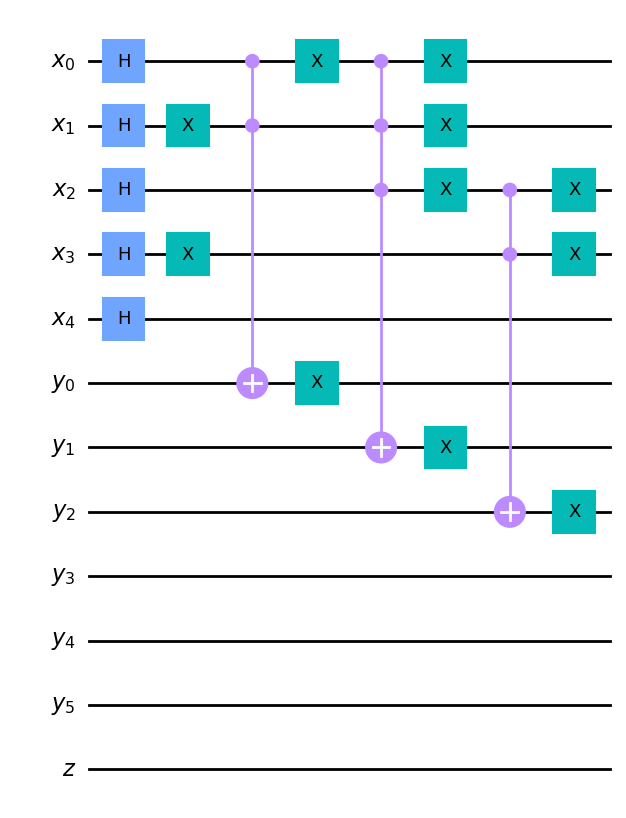

In [16]:
circuit.x(qreg_x[2])
circuit.x(qreg_x[3])
circuit.mcx(qreg_x[2:4], qreg_y[2])
circuit.x(qreg_x[2])
circuit.x(qreg_x[3])
circuit.x(qreg_y[2])
circuit.draw('mpl')

4th clause: $(\neg x_1 \lor \neg x_2 \lor x_3) \rightarrow \neg(x_1 \land x_2 \land \neg x_3)$

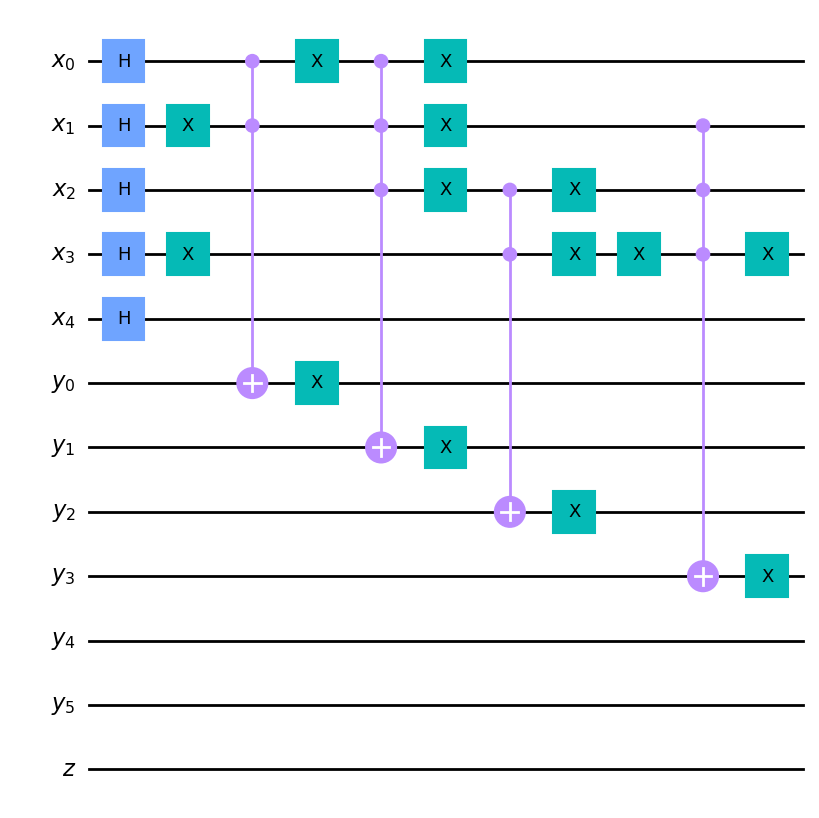

In [17]:
circuit.x(qreg_x[3])
circuit.mcx(qreg_x[1:4], qreg_y[3])
circuit.x(qreg_x[3])
circuit.x(qreg_y[3])
circuit.draw('mpl')

5th clause : $(\neg x_3 \lor \neg x_4) \rightarrow \neg(x_3 \land x_4)$

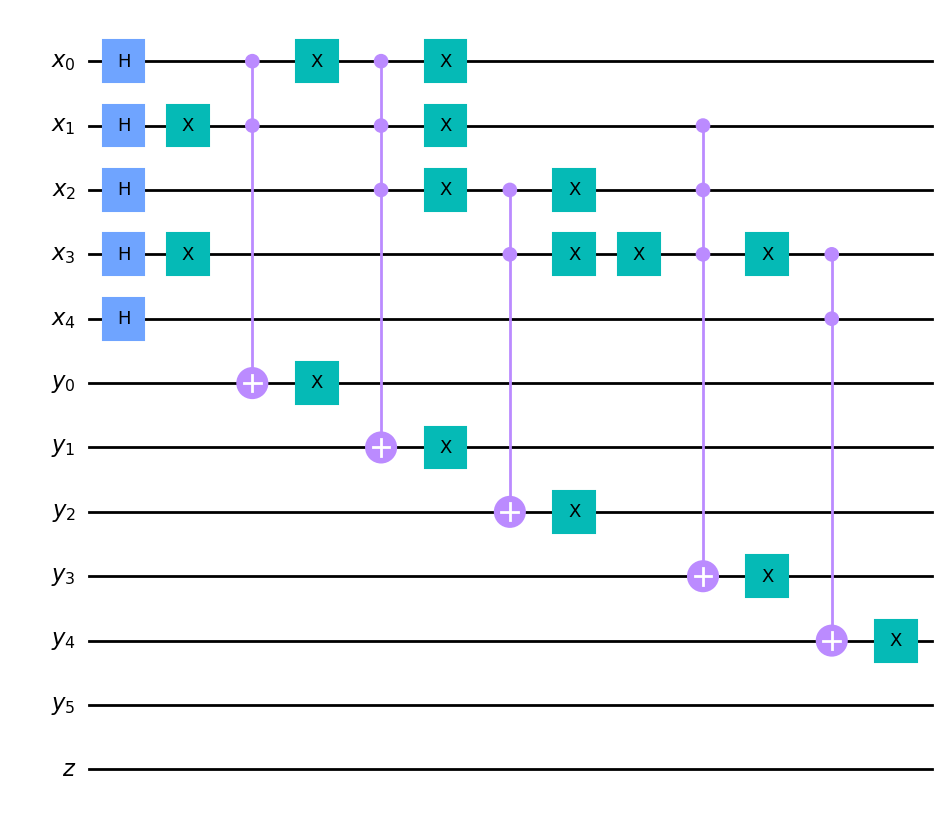

In [18]:
circuit.mcx(qreg_x[3:5], qreg_y[4])
circuit.x(qreg_y[4])
circuit.draw('mpl')

6th clause : $(\neg x_2 \lor \neg x_3 \lor x_4) \rightarrow \neg(x_2 \land x_3 \land \neg x_4)$

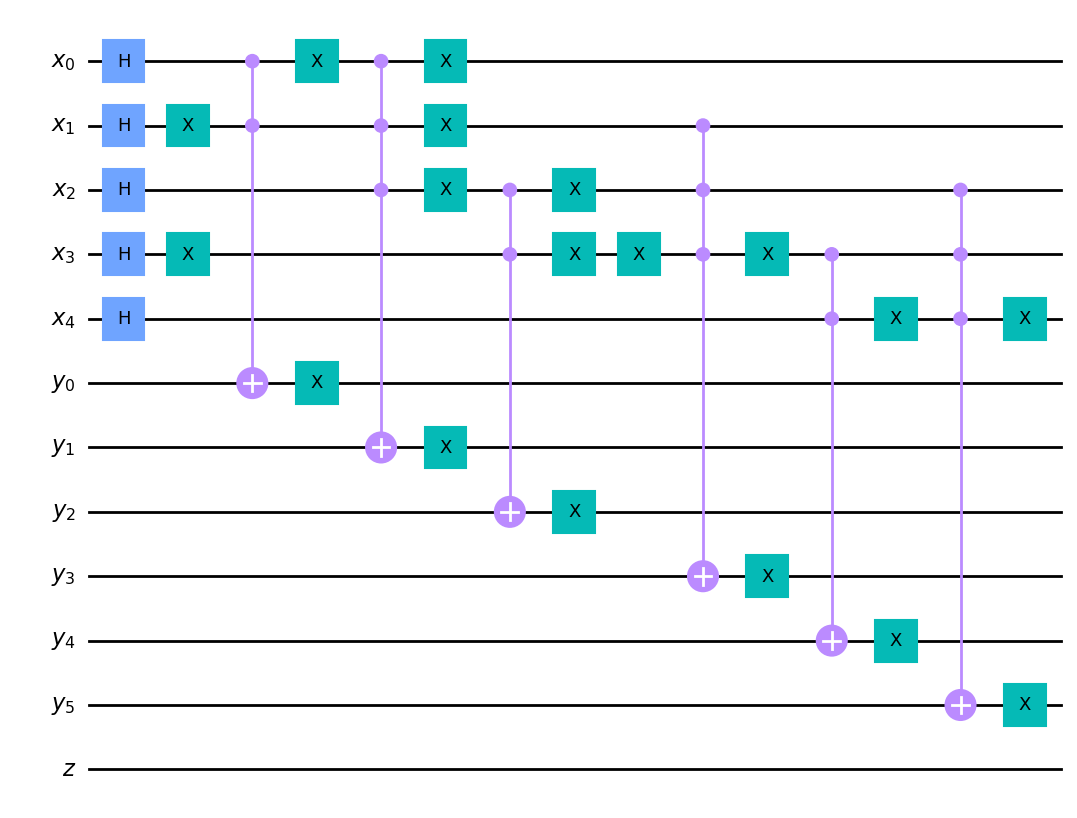

In [19]:
circuit.x(qreg_x[4])
circuit.mcx(qreg_x[2:5], qreg_y[5])
circuit.x(qreg_x[4])
circuit.x(qreg_y[5])
circuit.draw('mpl')

Now we use a multicontrol not of all 6 $y_i$'s onto z

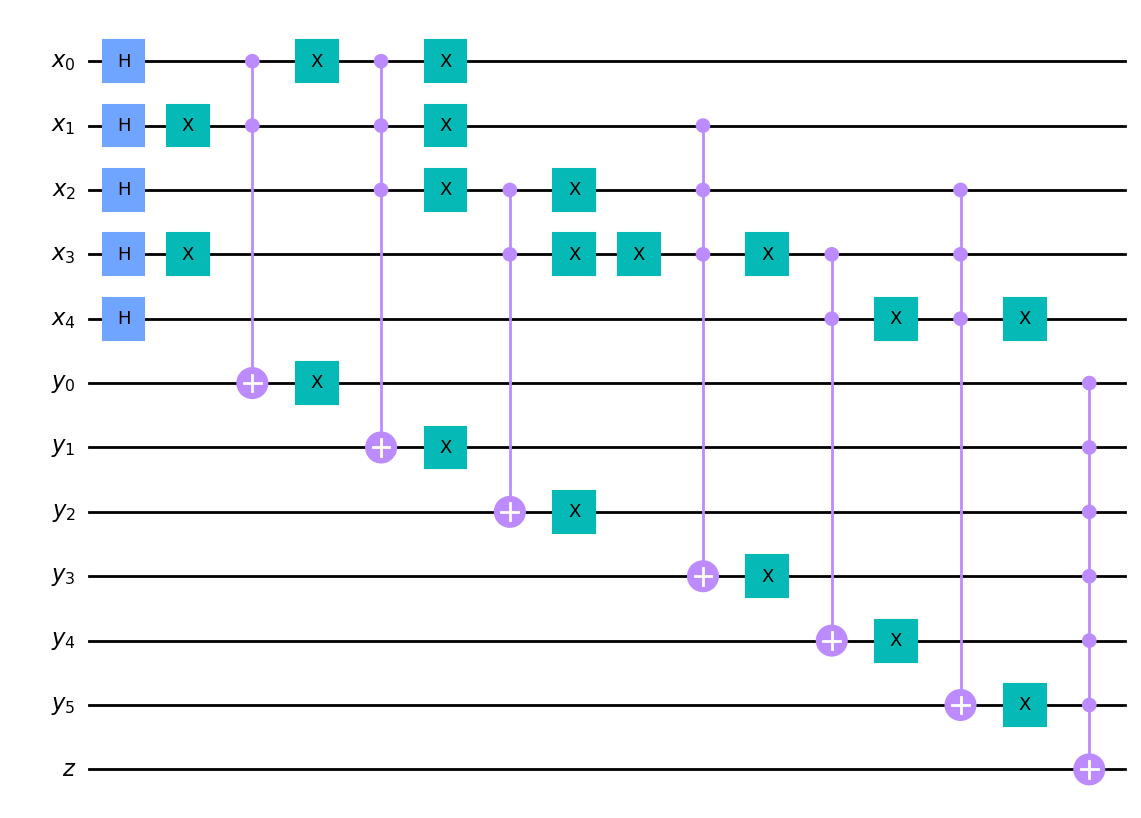

In [20]:
circuit.mcx(qreg_y[0:6], qreg_z[0])
circuit.draw('mpl')

Now we need to go back on all registers except for the z one to return to normal state. This can be achieved by merely applying the same gates again to the same bits, as both the X and the multicontrol not gate are their own inverse. We can do this all in one in the next cell.

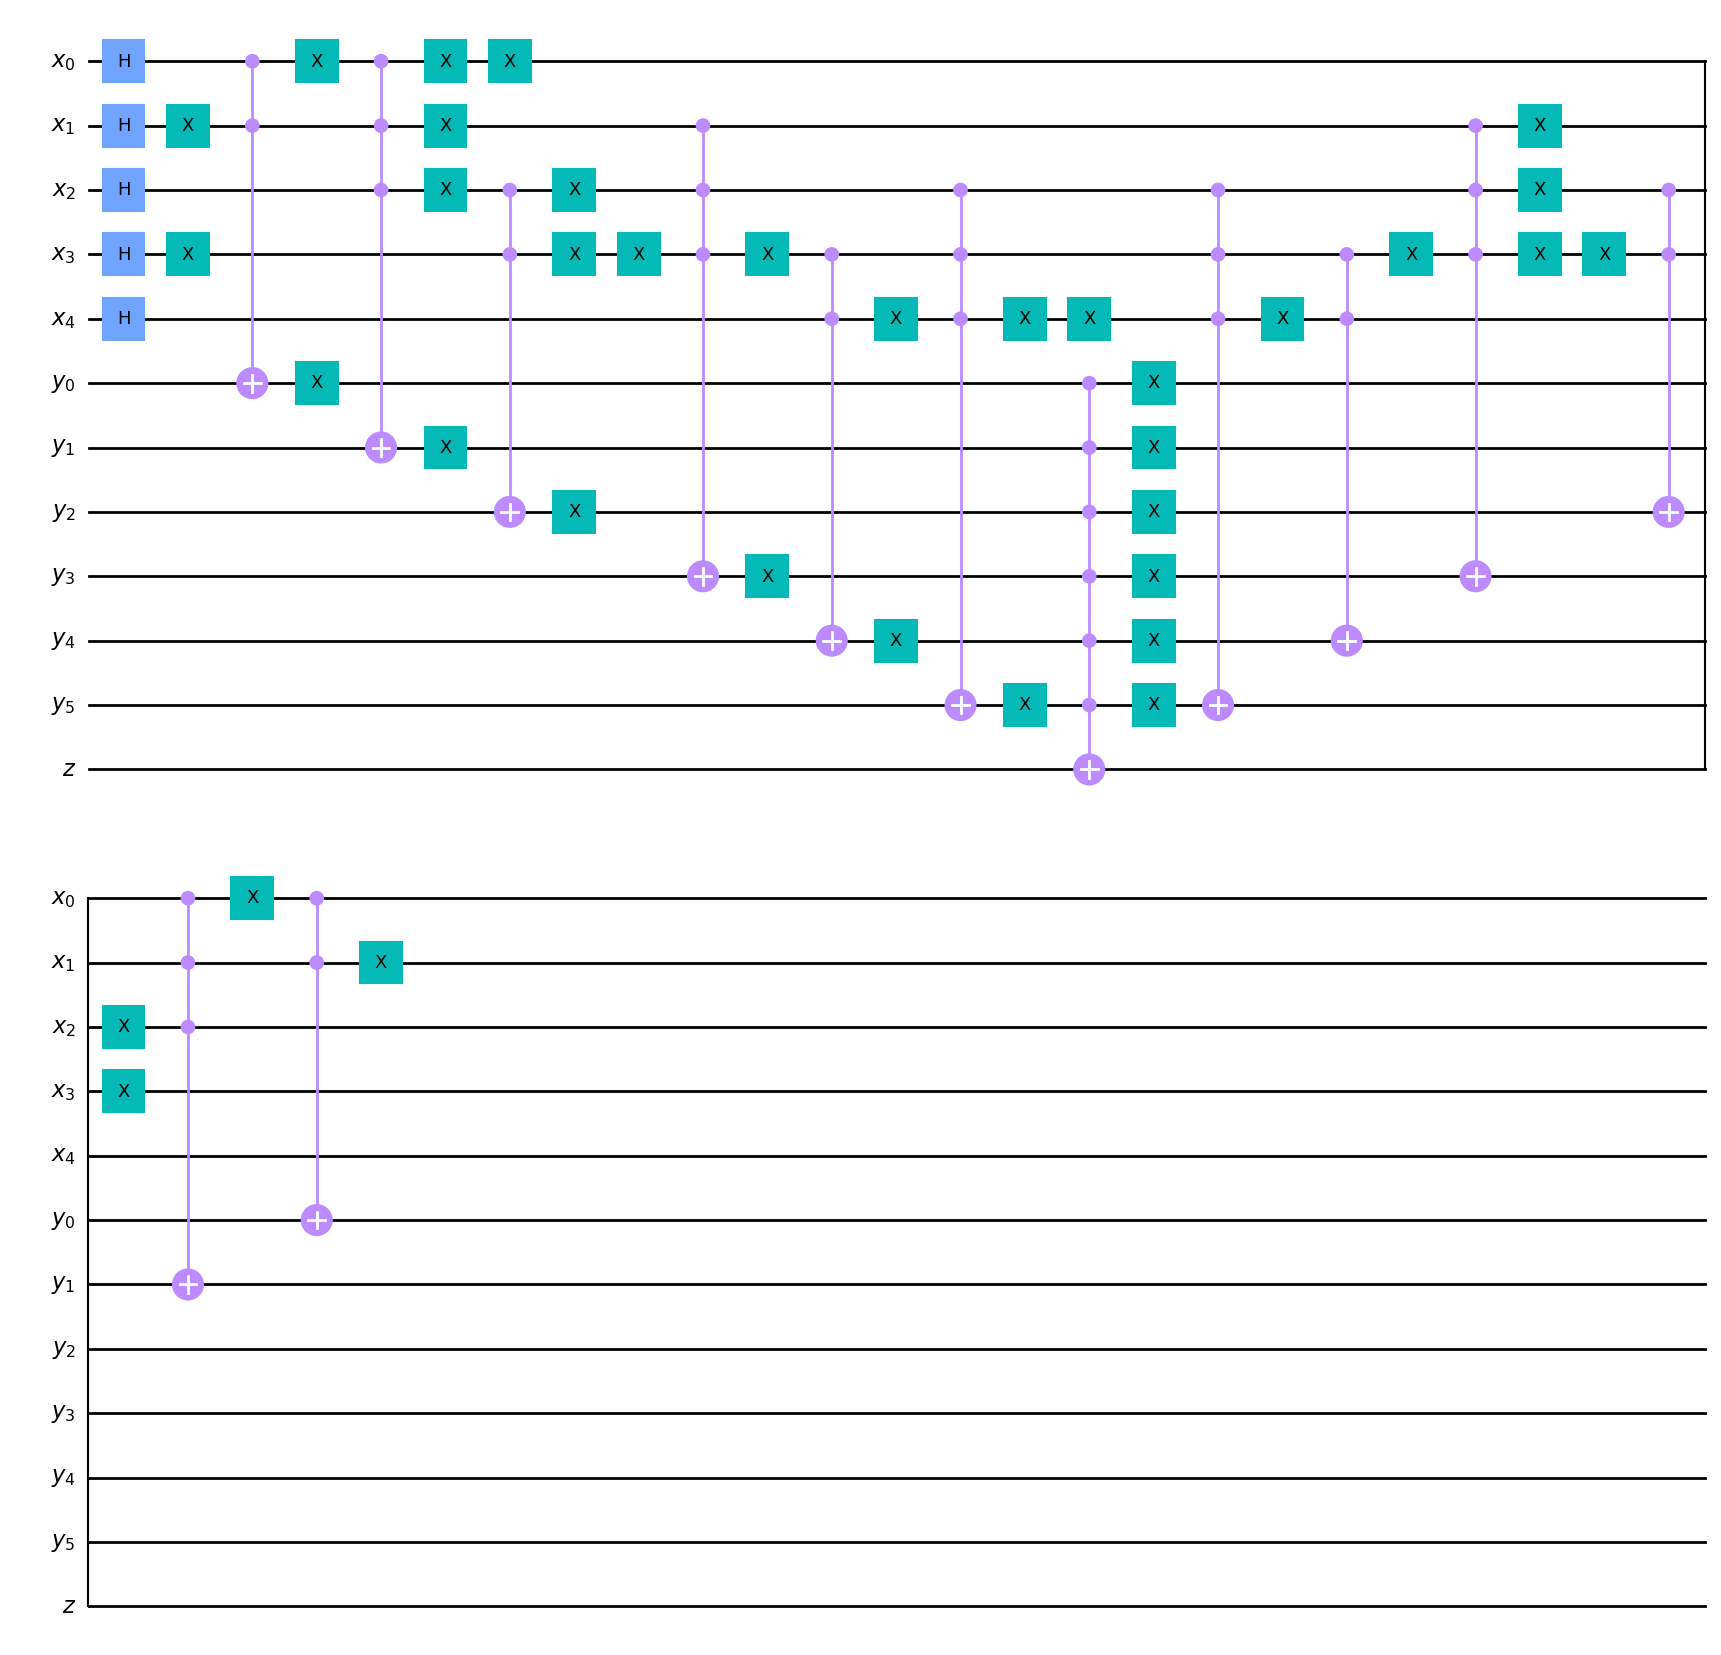

In [21]:
circuit.x(qreg_y[5])
circuit.x(qreg_x[4])
circuit.mcx(qreg_x[2:5], qreg_y[5])
circuit.x(qreg_x[4])
circuit.x(qreg_y[4])
circuit.mcx(qreg_x[3:5], qreg_y[4])
circuit.x(qreg_y[3])
circuit.x(qreg_x[3])
circuit.mcx(qreg_x[1:4], qreg_y[3])
circuit.x(qreg_x[3])
circuit.x(qreg_y[2])
circuit.x(qreg_x[3])
circuit.x(qreg_x[2])
circuit.mcx(qreg_x[2:4], qreg_y[2])
circuit.x(qreg_x[3])
circuit.x(qreg_x[2])
circuit.x(qreg_y[1])
circuit.x(qreg_x[1])
circuit.x(qreg_x[0])
circuit.mcx(qreg_x[0:3], qreg_y[1])
circuit.x(qreg_x[0])
circuit.x(qreg_y[0])
circuit.mcx(qreg_x[0:2], qreg_y[0])
circuit.x(qreg_x[1])
circuit.draw('mpl')

As the Algorithm will apply this transformation multiple times, it is best to create this as its own function, that takes as input a circuit, that is already existant, and attaches the oracle gate $U_f$ to it.

In [22]:
def uf(circuit, qreg_x, qreg_y, qreg_z):
    circuit.x(qreg_x[1])
    circuit.mcx(qreg_x[0:2], qreg_y[0])
    circuit.x(qreg_y[0])
    circuit.x(qreg_x[0])
    circuit.mcx(qreg_x[0:3], qreg_y[1])
    circuit.x(qreg_x[0])
    circuit.x(qreg_x[1])
    circuit.x(qreg_y[1])
    circuit.x(qreg_x[2])
    circuit.x(qreg_x[3])
    circuit.mcx(qreg_x[2:4], qreg_y[2])
    circuit.x(qreg_x[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_y[2])
    circuit.x(qreg_x[3])
    circuit.mcx(qreg_x[1:4], qreg_y[3])
    circuit.x(qreg_x[3])
    circuit.x(qreg_y[3])
    circuit.mcx(qreg_x[3:5], qreg_y[4])
    circuit.x(qreg_y[4])
    circuit.x(qreg_x[4])
    circuit.mcx(qreg_x[2:5], qreg_y[5])
    circuit.x(qreg_x[4])
    circuit.x(qreg_y[5])
    circuit.mcx(qreg_y[0:6], qreg_z[0])
    circuit.x(qreg_y[5])
    circuit.x(qreg_x[4])
    circuit.mcx(qreg_x[2:5], qreg_y[5])
    circuit.x(qreg_x[4])
    circuit.x(qreg_y[4])
    circuit.mcx(qreg_x[3:5], qreg_y[4])
    circuit.x(qreg_y[3])
    circuit.x(qreg_x[3])
    circuit.mcx(qreg_x[1:4], qreg_y[3])
    circuit.x(qreg_x[3])
    circuit.x(qreg_y[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_x[2])
    circuit.mcx(qreg_x[2:4], qreg_y[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_x[2])
    circuit.x(qreg_y[1])
    circuit.x(qreg_x[1])
    circuit.x(qreg_x[0])
    circuit.mcx(qreg_x[0:3], qreg_y[1])
    circuit.x(qreg_x[0])
    circuit.x(qreg_y[0])
    circuit.mcx(qreg_x[0:2], qreg_y[0])
    circuit.x(qreg_x[1])

***Question 3:***

Design the reflection operator R (not forgetting the pre and post Hadamard gates!)



**Answer**

We can firstly set n=2 and build the reflection operator in that case to get an idea of how to design the reflection operator for a general n

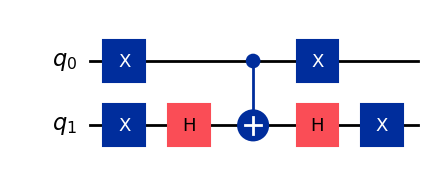

In [14]:
import qiskit
from qiskit import QuantumCircuit

reflection_n_2 = QuantumCircuit(2)
reflection_n_2.x(0)
reflection_n_2.x(1)
reflection_n_2.h(1)
reflection_n_2.cx(0, 1)
reflection_n_2.h(1)

reflection_n_2.x(0)
reflection_n_2.x(1)
reflection_n_2.draw('mpl')

this circuit translates the following operator: 1 - |00><00|

and thus the result is (1 - |00><00|)|q1>|q2>

We are seeking for a circuite that translates (1 - |0...0><0...0|)|q1>...|qn> with dimension n. To do so, we can try to generalize the circuit above, the generalisation gives the following circuit:


![reflection operator](reflection_operator.png)


***Question 4:***


***Question 5:***